# Basic Theory

### 가설(Hypothesis) 수립
- 머신 러닝에서 가설은 임의로 추측해서 세워보는 식일수도 있고, 경험적으로 알고 있는 식일 수도 있습니다.
  그리고 맞는 가설이 아니라고 판단되면 계속 수정해나가게 되는 식이기도 합니다.
- **선형 회귀**란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일입니다.

    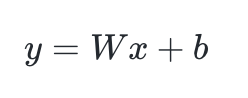
### 비용 함수 (Cost function)에 대한 이해
- **비용 함수(cost function)** = **손실 함수(loss function)** = **오차 함수(error function)** = **목적 함수(objective function)**
- 평균 제곱 오차를 W와 b에 의한 비용 함수로 재정의
  - 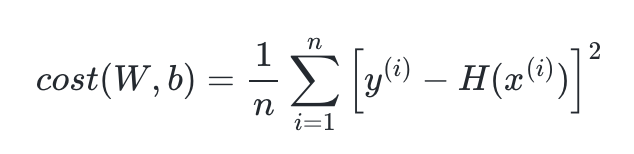

### 옵티마이저 - 경사 하강법 (Gradient Descent)
비용 함수의 값을 최소로 하는 W와 b를 찾는 방법중 옵티마이저 알고리즘이 있다. **최적화 알고리즘**이라고 불리운다.

- **선형 회귀에 가장 적합한 비용 함수는 평균 제곱 오차, 옵티마이저는 경사 하강법입니다.**
  - 경사하강법의 아이디어는 비용 함수(Cost function)를 미분하여 현재에서의 접선의 기울기를 구하고, 접선의 기울기가 낮은 방향으로 
    의 값을 변경하는 작업을 반복하는 것에 있습니다.
  - 반복을 하면서 적절한 학습률을 조절해가며 최적의 W와 b의 값을 찾아나간다.

# 파이토치로 선형 회귀 구현하기

In [1]:
# !pip3 install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/16/dd/1bf10180ba812afa1aa7427466083d731bc37b9a1157ec929d0cfeef87eb/torch-2.1.0-cp311-none-macosx_10_9_x86_64.whl.metadata
  Using cached torch-2.1.0-cp311-none-macosx_10_9_x86_64.whl.metadata (24 kB)
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/5e/5d/97afbafd9d584ff1b45fcb354a479a3609bd97f912f8f1f6c563cb1fae21/filelock-3.12.4-py3-none-any.whl.metadata
  Using cached filelock-3.12.4-py3-none-any.whl.metadata (2.8 kB)
  Obtaining dependency information for typing-extensions from https://files.pythonhosted.org/packages/24/21/7d397a4b7934ff4028987914ac1044d3b7d52712f30e2ac7a2ae5bc86dd0/typing_extensions-4.8.0-py3-none-any.whl.metadata
  Using cached typing_extensions-4.8.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Obtaining dependency information for fssp

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [79]:
#random_seed
torch.manual_seed(1)

#### 1. 변수 선언

In [80]:
x_train = torch.FloatTensor([[1.],[2.],[3.]])
y_train = torch.FloatTensor([[2.],[4.],[6.]])

In [81]:
print(x_train)

tensor([[1.],
        [2.],
        [3.]])


In [82]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


#### 2. 가중치와 편향의 초기화
- 선형 회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일입니다.
- 그리고 가장 잘 맞는 직선을 정의하는 것은 바로 W와 b입니다.
- 선형 회귀의 목표는 가장 잘 맞는 직선을 정의하는 W 와 b 의 값을 찾는 것입니다.

In [83]:
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수(requires_grad)임을 명시함.
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [84]:
print(W,b)

tensor([0.], requires_grad=True) tensor([0.], requires_grad=True)


#### 3. 가설 세우기

In [85]:
hypothesis = W*x_train + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


#### 4. 비용 함수 선언하기
- 파이토치 코드 상으로 선형 회귀의 비용 함수에 해당되는 **평균 제곱 오차**를 선언합니다
- 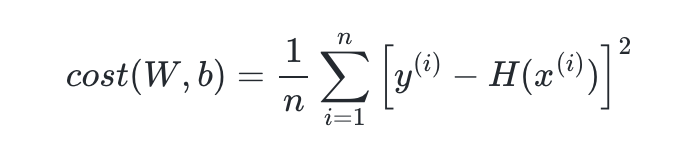

In [86]:
cost = torch.mean((hypothesis - y_train) ** 2)

In [87]:
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


#### 5. 경사 하강법 구현하기
- `SGD`는 경사 하강법의 일종
- `lr`은 학습률(learning rate)를 의미한다

In [88]:
optimizer = optim.SGD([W,b], lr = 0.01)

In [90]:
# gradient를 0으로 초기화
# 기울기를 초기화해야만 새로운 가중치 편향에 대해서 새로운 기울기를 구할 수 있다
optimizer.zero_grad()
# 비용 함수를 미분하여 gradient 계산한다
cost.backward()
# W와 b를 업데이트
optimizer.step() # 기울기에 학습률(learining rate) 0.01을 곱하여 빼줌으로서 업데이트한다.

#### 6. total code

In [32]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복

for epoch in range(nb_epochs + 1):
    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(W.grad,b.grad,cost)
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))


tensor([-18.6667]) tensor([-8.]) tensor(18.6667, grad_fn=<MeanBackward0>)
Epoch    0/1000 W: 0.187, b: 0.080 Cost: 18.666666
tensor([-0.0614]) tensor([0.1392]) tensor(0.0482, grad_fn=<MeanBackward0>)
Epoch  100/1000 W: 1.746, b: 0.578 Cost: 0.048171
tensor([-0.0482]) tensor([0.1095]) tensor(0.0298, grad_fn=<MeanBackward0>)
Epoch  200/1000 W: 1.800, b: 0.454 Cost: 0.029767
tensor([-0.0379]) tensor([0.0861]) tensor(0.0184, grad_fn=<MeanBackward0>)
Epoch  300/1000 W: 1.843, b: 0.357 Cost: 0.018394
tensor([-0.0298]) tensor([0.0677]) tensor(0.0114, grad_fn=<MeanBackward0>)
Epoch  400/1000 W: 1.876, b: 0.281 Cost: 0.011366
tensor([-0.0234]) tensor([0.0532]) tensor(0.0070, grad_fn=<MeanBackward0>)
Epoch  500/1000 W: 1.903, b: 0.221 Cost: 0.007024
tensor([-0.0184]) tensor([0.0418]) tensor(0.0043, grad_fn=<MeanBackward0>)
Epoch  600/1000 W: 1.924, b: 0.174 Cost: 0.004340
tensor([-0.0145]) tensor([0.0329]) tensor(0.0027, grad_fn=<MeanBackward0>)
Epoch  700/1000 W: 1.940, b: 0.136 Cost: 0.002682


- 최종 훈련 결과를 보면 최적의 기울기 W는 2에 가깝고, b는 0에 가까운 것을 볼 수 있습니다.
- 현재 훈련 데이터가 x_train은 [[1], [2], [3]]이고 y_train은 [[2], [4], [6]]인 것을 감안하면
- 실제 정답은 W가 2이고, b가 0인 `H(x) = 2x`이므로 거의 정답을 찾은 셈입니다.

#### 7. optimizer.zero_grad()가 필요한 이유
- 파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있다
- 아래의 예로 미분값이 2가 누적되는 것을 볼 수 있게 된다.
- 그렇기 때문에 할 때 마다 optimizer.zero_grad()를 통해 초기화 해줘야 한다

In [24]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))


수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


#### 8. 자동 미분(Autograd)
- 경사 하강법 코드를 보고있으면 `requires_grad=True`, `backward()`의 표현이 자동 미분 기능이다

In [26]:
import torch

In [27]:
w = torch.tensor(2.0,requires_grad = True)

In [28]:
y = w**2
z = 2*y + 5

In [30]:
#w에 대해서 미분을 해야한다.
z.backward() # backward -> w에 대한 기울기를 계산한다.

In [31]:
print('수식을 w로 미분한 값 {}'.format(w.grad))

수식을 w로 미분한 값 8.0


- 자동으로 미분된 값이 저장된 모습을 볼 수 있게 된다.